In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Pre-processing
df = pd.read_csv("cardio_train.csv",sep=';')
df = df.drop(["id"],axis = 1)
display(df)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


<AxesSubplot:xlabel='gender'>

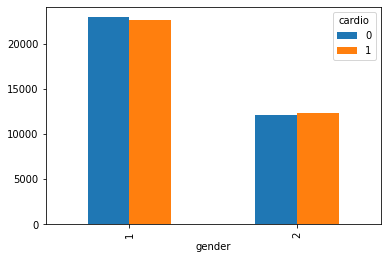

In [3]:
pd.crosstab(df.gender,df.cardio).plot(kind='bar')

<AxesSubplot:xlabel='cholesterol'>

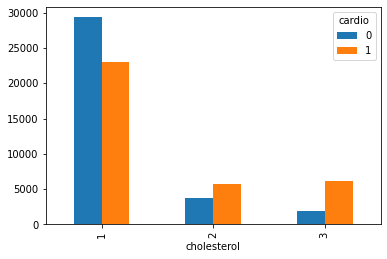

In [4]:
pd.crosstab(df.cholesterol,df.cardio).plot(kind='bar')

<AxesSubplot:xlabel='gluc'>

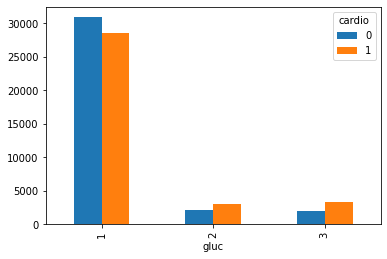

In [5]:
pd.crosstab(df.gluc,df.cardio).plot(kind='bar')

<AxesSubplot:xlabel='smoke'>

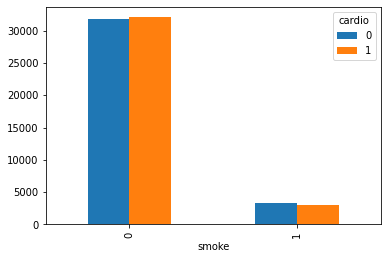

In [6]:
pd.crosstab(df.smoke,df.cardio).plot(kind='bar')

<AxesSubplot:xlabel='alco'>

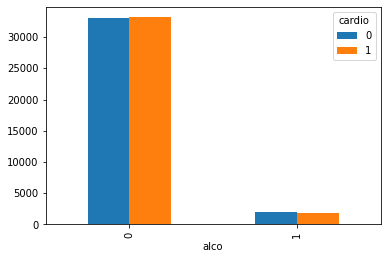

In [7]:
pd.crosstab(df.alco,df.cardio).plot(kind='bar')

<AxesSubplot:xlabel='active'>

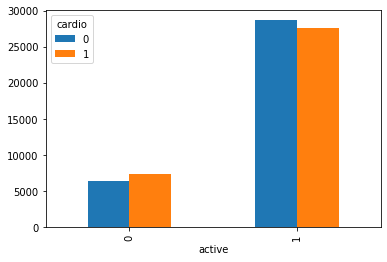

In [8]:
pd.crosstab(df.active,df.cardio).plot(kind='bar')

In [9]:
sd = StandardScaler()
df_number = df.drop(["gender","cholesterol","gluc","smoke","alco","active","cardio"],axis = 1)
df_categorical = df.drop(["age","height","weight","ap_hi","ap_lo"],axis = 1)
target_normal = sd.fit_transform(df_number)
df_normal = pd.DataFrame(target_normal,columns=["age","height","weight","ap_hi","ap_lo"])
df_final = pd.concat([df_normal,df_categorical],axis = 1,join="inner")

In [10]:
X = df_final.drop(["cardio"],axis = 1)
y = df_final["cardio"]
Xtrain,Xtest,ytrain,ytest = train_test_split(X, y, test_size=0.3,random_state = 20220516)
Xtrain.to_csv('Xtrain.csv',index=False)
Xtest.to_csv('Xtest.csv',index=False)
ytrain.to_csv('ytrain.csv',index=False)
ytest.to_csv('ytest.csv',index=False)

In [15]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
Xtrain,Xtest,ytrain,ytest = train_test_split(X, y, test_size=0.3)

clf = DecisionTreeClassifier(random_state = 0)
rfc = RandomForestClassifier(random_state = 0)
clf = clf.fit(Xtrain,ytrain)
rfc = rfc.fit(Xtrain,ytrain)
score_c = clf.score(Xtest,ytest)
score_r = rfc.score(Xtest,ytest)

print("Single Tree: {}".format(score_c),"Random Forest: {}".format(score_r))


Single Tree: 0.6395714285714286 Random Forest: 0.7163809523809523


In [ ]:
from sklearn.model_selection import cross_val_score

rfc = RandomForestClassifier(n_estimators=25)
rfc_s = cross_val_score(rfc,Xtrain,ytrain,cv=10)

clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf,Xtrain,ytrain,cv=10)

plt.plot(range(1,11),rfc_s, label = "Random Forest")
plt.plot(range(1,11),clf_s, label = "Decision Tree")
plt.legend()
plt.show()

